In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

In [68]:
sensor=pd.read_csv("D:/sidang/ta/all.csv")
sensor.head()

,id,time,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
0,1,4/5/2021 16:44,174,68,73,44,48,202
1,2,4/5/2021 16:47,170,67,94,44,48,198
2,3,4/5/2021 16:48,171,67,98,44,49,197
3,4,4/5/2021 16:49,171,68,91,44,51,196
4,5,4/5/2021 16:51,174,67,65,47,51,196


In [69]:
sensor=sensor.drop(["id","time"], axis=1)
sensor

,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
0,174,68,73,44,48,202
1,170,67,94,44,48,198
2,171,67,98,44,49,197
3,171,68,91,44,51,196
4,174,67,65,47,51,196
...,...,...,...,...,...,...
3523,33,52,29,69,27,70
3524,32,52,28,69,26,69
3525,32,52,29,68,26,68
3526,32,55,32,68,28,67


In [70]:
sensor.shape

(3528, 6)

In [71]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sensor_A  3528 non-null   int64
 1   sensor_B  3528 non-null   int64
 2   sensor_C  3528 non-null   int64
 3   sensor_D  3528 non-null   int64
 4   sensor_E  3528 non-null   int64
 5   sensor_F  3528 non-null   int64
dtypes: int64(6)
memory usage: 165.5 KB


In [72]:
sensor.describe()

,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,63.271259,25.271825,17.645125,35.172336,22.670635,68.614796
std,31.034125,18.959512,13.247954,13.164842,17.735921,29.977260
min,29.000000,12.000000,9.000000,25.000000,9.000000,47.000000
25%,49.000000,13.000000,10.000000,28.000000,13.000000,55.000000
50%,53.000000,14.000000,11.000000,29.000000,16.000000,57.000000
75%,56.000000,35.000000,19.000000,35.000000,20.000000,61.000000
max,177.000000,107.000000,98.000000,86.000000,92.000000,204.000000


In [73]:
#atur data
x=sensor.iloc[:,0:6].values
print(x)

[[174  68  73  44  48 202]
 [170  67  94  44  48 198]
 [171  67  98  44  49 197]
 ...
 [ 32  52  29  68  26  68]
 [ 32  55  32  68  28  67]
 [ 32  72  43  63  43  59]]


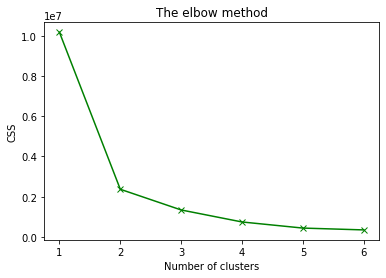

In [74]:
from sklearn.metrics import davies_bouldin_score
css=[]

#Menemukan inersia pada berbagai nilai k
for i in range(1,7):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 7), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()


In [75]:
#evalusi hasil k-means pakai DBI
from sklearn.metrics import davies_bouldin_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(x)
    db_index = davies_bouldin_score(x, labels)
    results.update({i: db_index})

In [76]:
#hasilnya
results

{2: 0.4686190247930213,
 3: 0.48937132662326627,
 4: 0.5251876532135514,
 5: 0.5059473787621218,
 6: 0.5268644662414982,
 7: 0.5460722523641883,
 8: 0.5407761106998793,
 9: 0.6242880830551325,
 10: 0.6495342146036649}

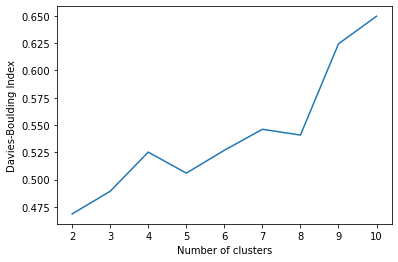

In [77]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()


In [78]:
#implementasi k-means
kmeans = KMeans(n_clusters=2,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [79]:
kmeans.cluster_centers_

array([[ 50.44540131,  17.96520841,  12.38270754,  30.23389597,
         15.45125732,  56.19462625],
       [122.8448    ,  59.2096    ,  42.088     ,  58.1104    ,
         56.2032    , 126.304     ]])

In [80]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [81]:
sensor["kluster"]=kmeans.labels_

In [82]:
kmeans.cluster_centers_

array([[ 50.44540131,  17.96520841,  12.38270754,  30.23389597,
         15.45125732,  56.19462625],
       [122.8448    ,  59.2096    ,  42.088     ,  58.1104    ,
         56.2032    , 126.304     ]])

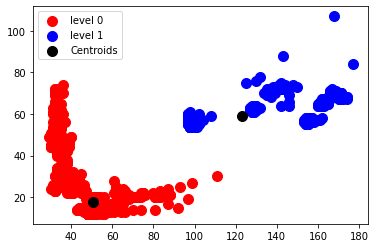

In [83]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'level 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'level 1')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [84]:
sensor.to_csv("result all-k1.csv")